In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

In [2]:
train = pd.read_csv("train.csv")
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0   
1   2          20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0   
2   3          60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0   
3   4          70       RL       60.000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0   
4   5          60       RL       84.000    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ         655          Unf           0        490         1145    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd     2003.000          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500  
1       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn           2        

In [3]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [
        col
        for col in dataframe.columns
        if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"
    ]
    cat_but_car = [
        col
        for col in dataframe.columns
        if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"
    ]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, cat_but_car


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe.isnull().sum().sort_values(ascending=False)
    ratio = (dataframe.isnull().sum() / dataframe.shape[0] * 100).sort_values(
        ascending=False
    )
    missing_df = pd.concat(
        [n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"]
    )
    print(missing_df, end="\n")
    if na_name:
        return na_columns


def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe
    for col in na_columns:
        temp_df[col + "_NA_FLAG"] = np.where(
            temp_df[col].isnull(), 1, 0
        )  # eksik olanlar = 1, olmayanalar = 0
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(
            pd.DataFrame(
                {
                    "TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                    "COUNT": temp_df.groupby(col)[target].count(),
                }
            ),
            end="\n\n",
        )


def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


def cat_summary(dataframe, col_name, plot=False):
    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)


def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (60, 40)})
        sns.heatmap(corr, cmap="RdBu", annot= True, fmt=".1g")
        plt.show()
    return drop_list


def cat_to_target_mean(dataframe, col_name, target):
    print(dataframe.groupby(col_name)[target].mean())


def target_to_num_mean(dataframe, col_name, target):
    print(dataframe.groupby(target).agg({col_name: "mean"}))


def outlier_trasholds(dataframe, col_name, q1=0.25, q3=0.75):
    qrt1 = dataframe[col_name].quantile(q1)
    qrt3 = dataframe[col_name].quantile(q3)
    iqr = qrt3 - qrt1
    upper = qrt3 + 1.5 * iqr
    lower = qrt1 - 1.5 * iqr
    return lower, upper


def check_outlier(dataframe, col_name):
    lo, up = outlier_trasholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < lo) | (dataframe[col_name] > up)].any(axis=None):
        return True
    else:
        return False


def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe.isnull().sum().sort_values(ascending=False)
    ratio = (dataframe.isnull().sum() / dataframe.shape[0] * 100).sort_values(
        ascending=False
    )
    missing_df = pd.concat(
        [n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"]
    )
    print(missing_df, end="\n")
    if na_name:
        return na_columns


def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + "_NA_FLAG"] = np.where(
            temp_df[col].isnull(), 1, 0
        )  # eksik olanlar = 1, olmayanalar = 0
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(
            pd.DataFrame(
                {
                    "TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                    "COUNT": temp_df.groupby(col)[target].count(),
                }
            ),
            end="\n\n",
        )


def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_trasholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low) | (dataframe[color] > up)].shape[0] > 10:
        print(dataframe[(dataframe[col_name] < low) | (dataframe[color] > up)].head())
    else:
        print(dataframe[(dataframe[col_name] < low) | (dataframe[color] > up)])

    if index:
        outlier_index = dataframe[(dataframe[col_name] < low) | (dataframe[color] > up)].index
        return outlier_index

In [4]:
missing_values_table(train)

               n_miss  ratio
PoolQC           1453 99.520
MiscFeature      1406 96.300
Alley            1369 93.770
Fence            1179 80.750
FireplaceQu       690 47.260
LotFrontage       259 17.740
GarageYrBlt        81  5.550
GarageCond         81  5.550
GarageType         81  5.550
GarageFinish       81  5.550
GarageQual         81  5.550
BsmtFinType2       38  2.600
BsmtExposure       38  2.600
BsmtQual           37  2.530
BsmtCond           37  2.530
BsmtFinType1       37  2.530
MasVnrArea          8  0.550
MasVnrType          8  0.550
Electrical          1  0.070
Id                  0  0.000
Functional          0  0.000
Fireplaces          0  0.000
KitchenQual         0  0.000
KitchenAbvGr        0  0.000
BedroomAbvGr        0  0.000
HalfBath            0  0.000
FullBath            0  0.000
BsmtHalfBath        0  0.000
TotRmsAbvGrd        0  0.000
GarageCars          0  0.000
GrLivArea           0  0.000
GarageArea          0  0.000
PavedDrive          0  0.000
WoodDeckSF    

In [5]:
cat_cols, num_cols, cat_but_car = grab_col_names(train)

Observations: 1460
Variables: 81
cat_cols: 53
num_cols: 27
cat_but_car: 1
num_but_cat: 11


C:\Users\MehmetOK\AppData\Local\Temp\ipykernel_5364\3628462580.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=train.corr()


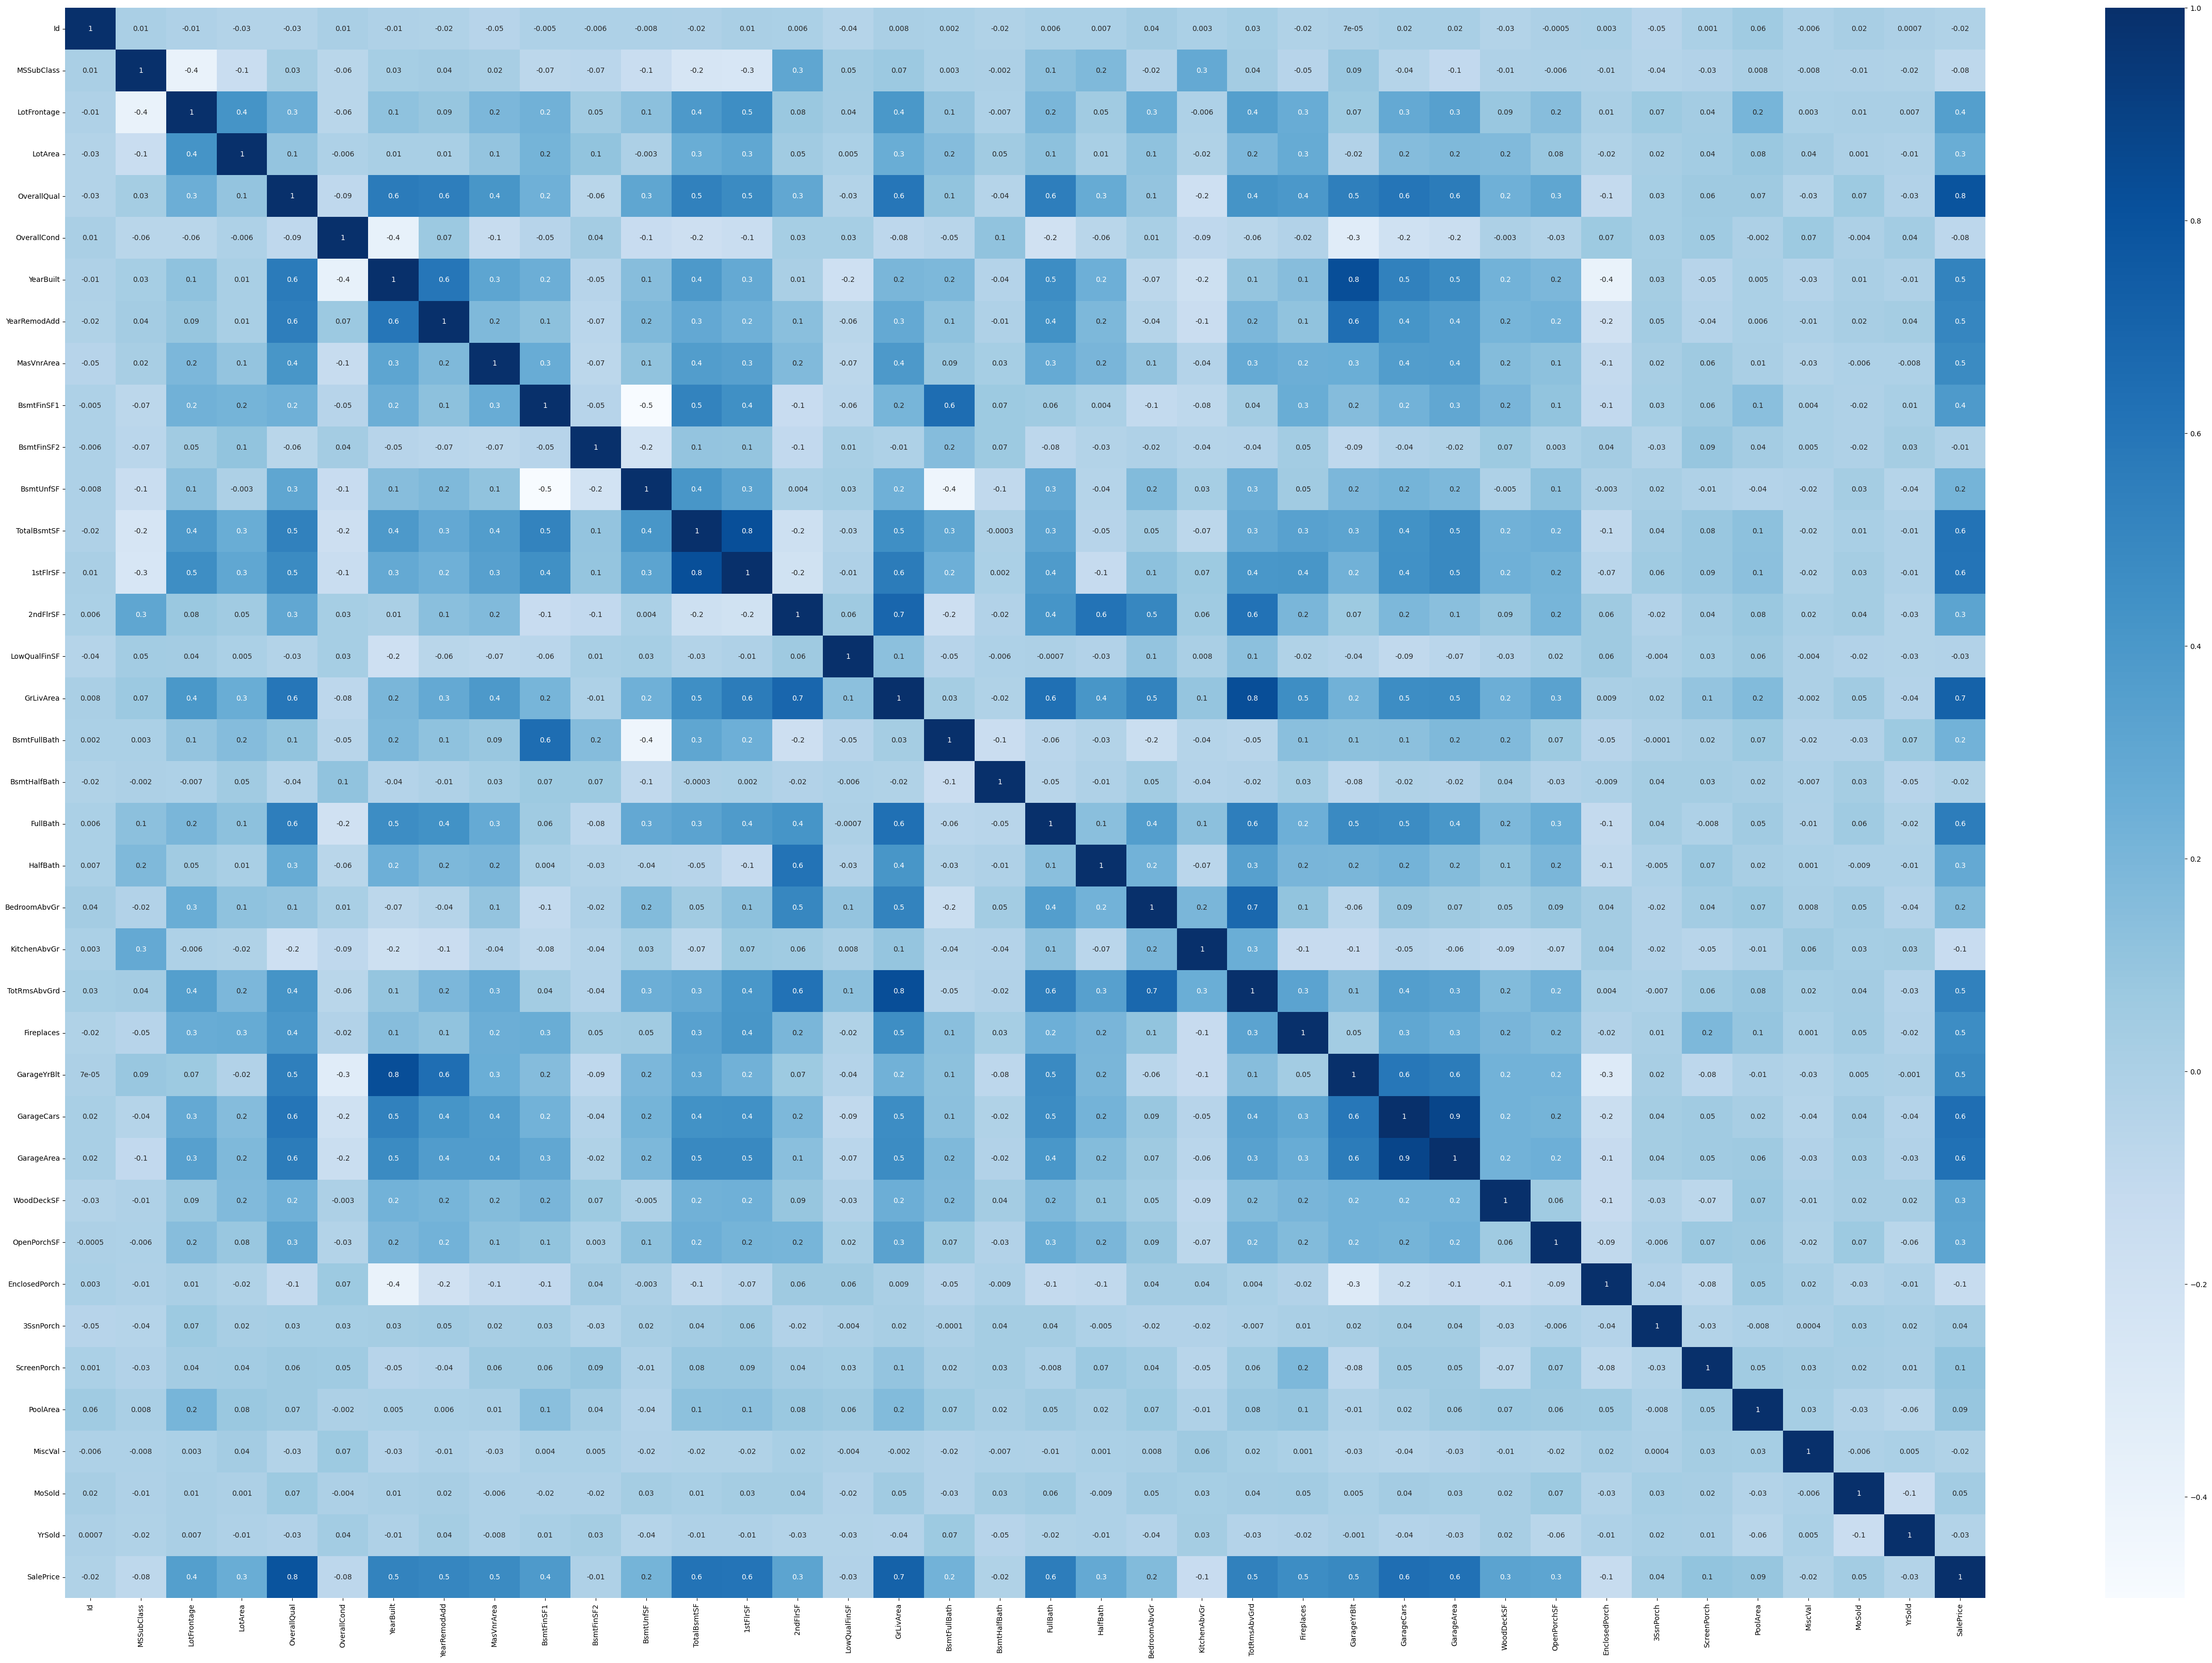

In [6]:
cor=train.corr()
plt.figure(figsize=(60,40))
sns.heatmap(data=cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

C:\Users\MehmetOK\AppData\Local\Temp\ipykernel_5364\1502115030.py:149: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframe.corr()


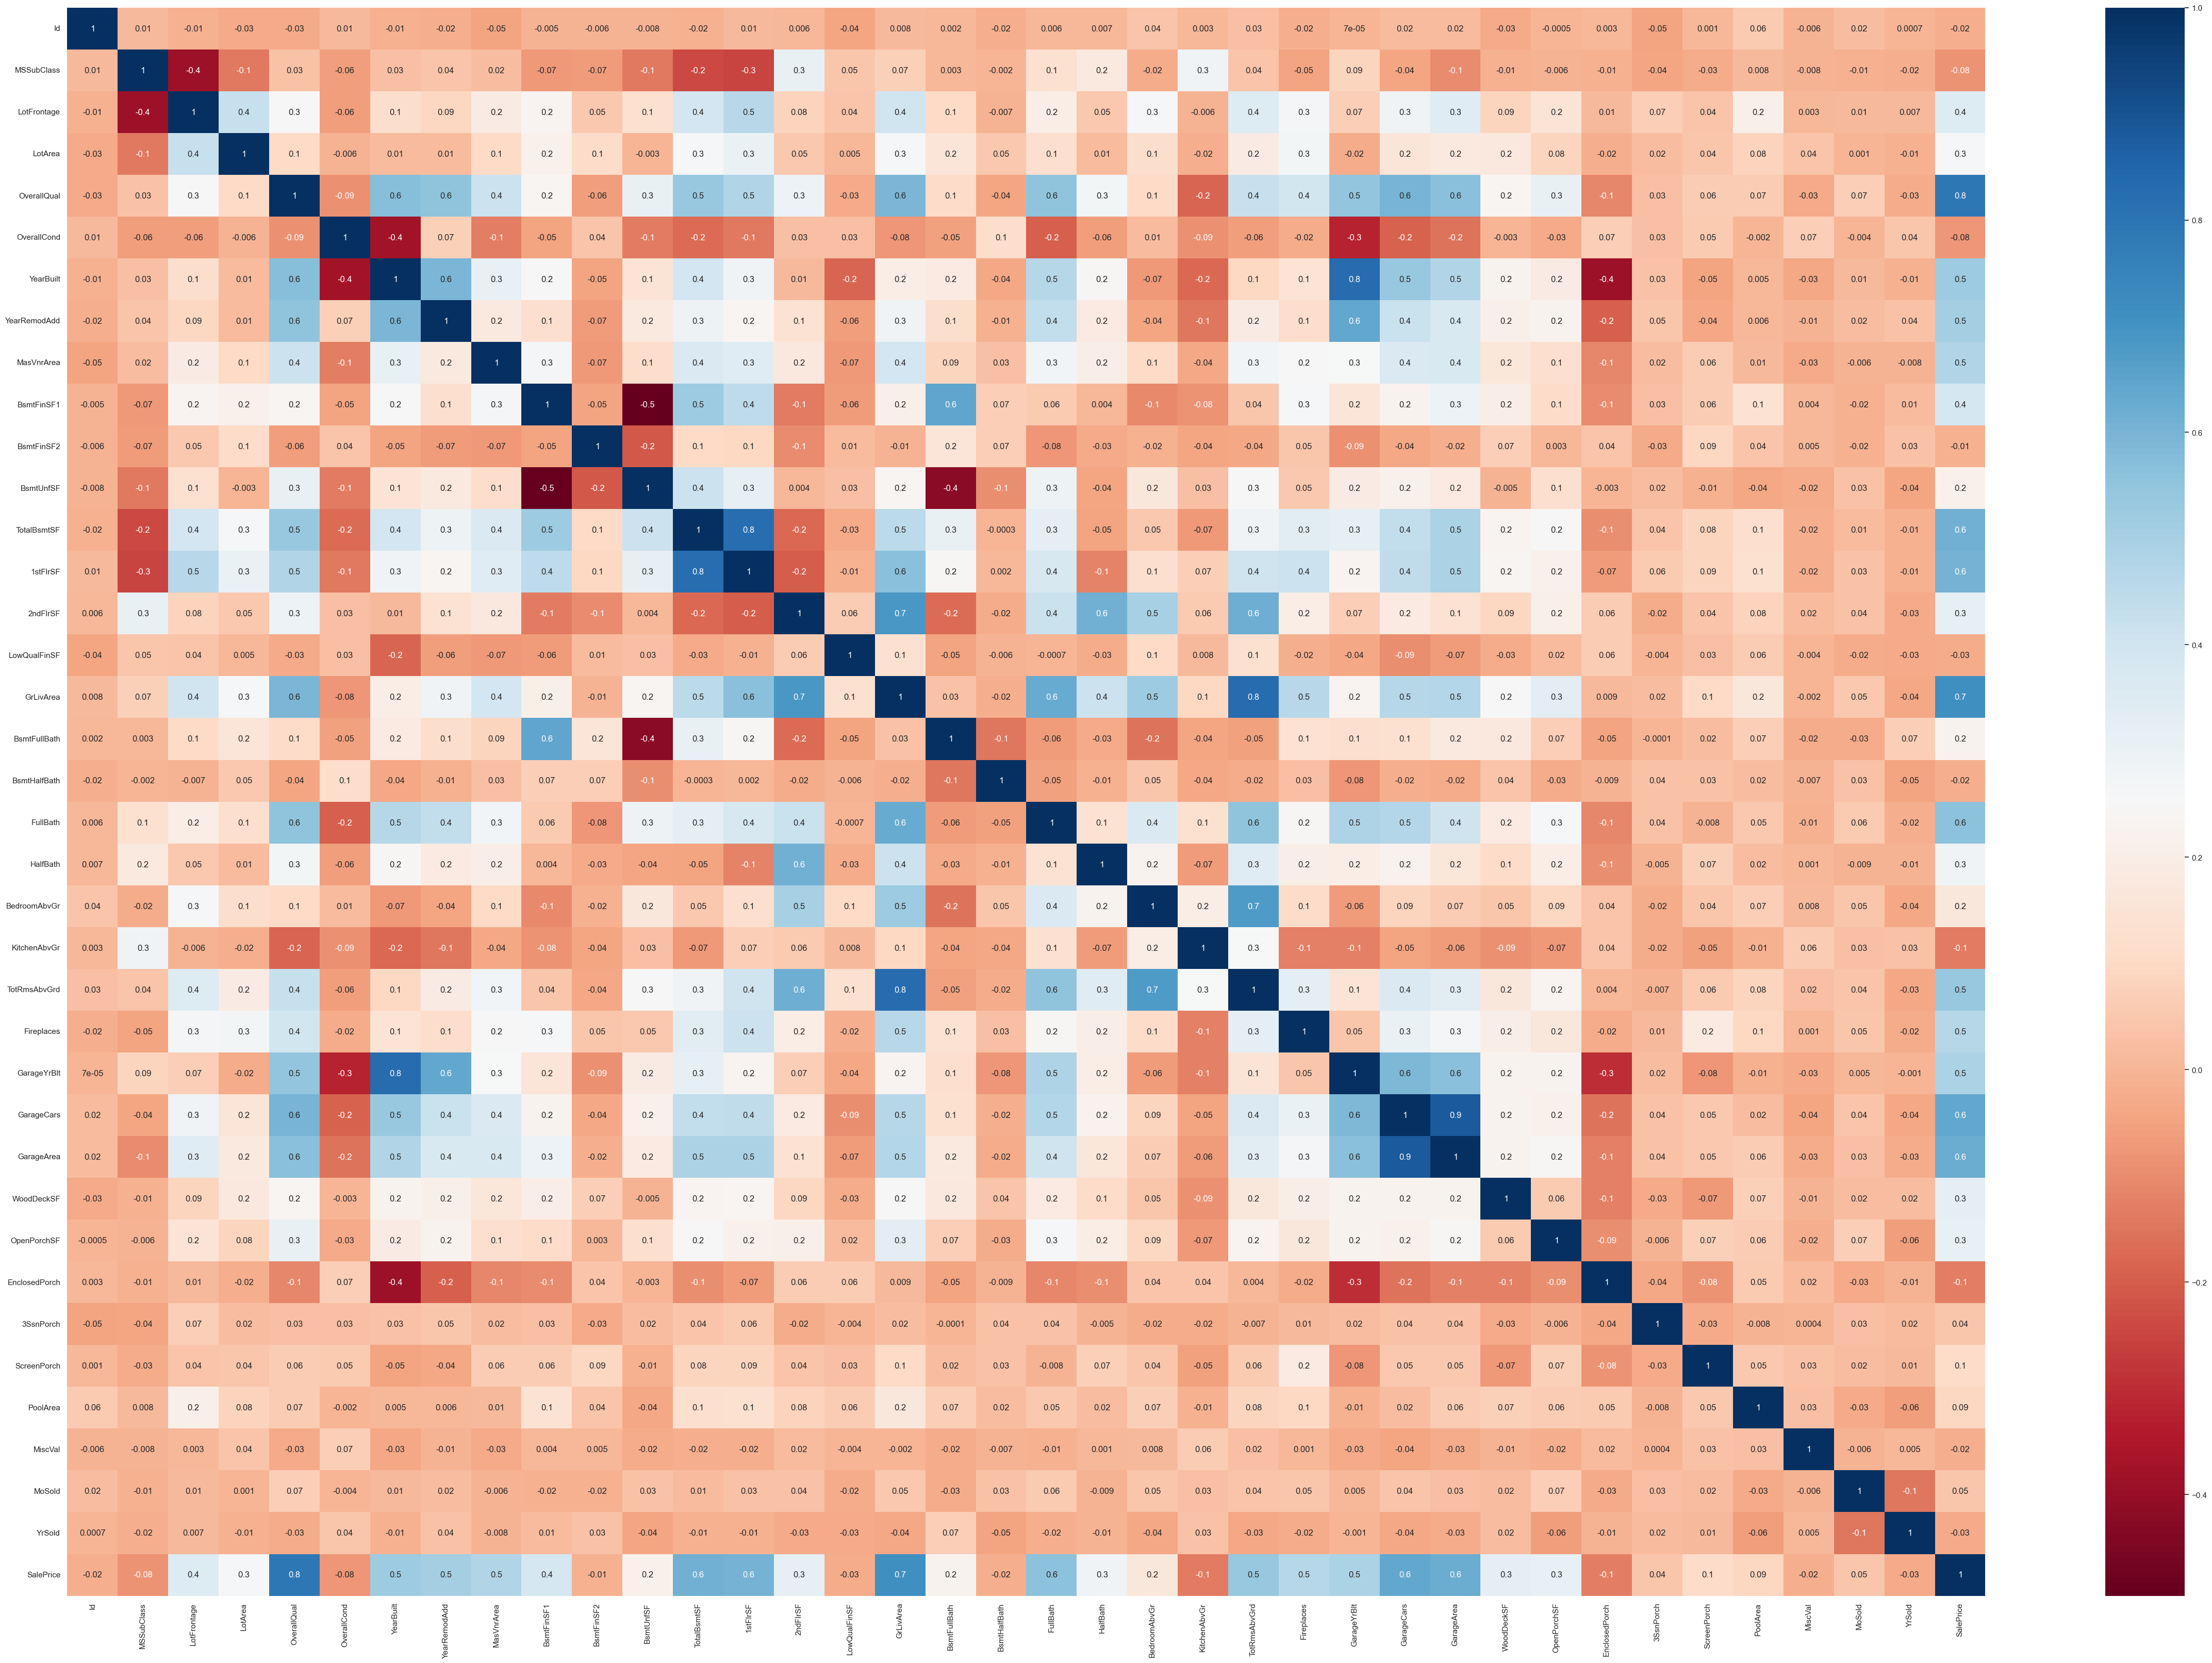

In [7]:
hc_drop_list = high_correlated_cols(train, True, 0.85)

In [8]:
hc_drop_list

['GarageArea']

In [9]:
train = train.drop("GarageArea", axis=1)

In [10]:
cat_cols, num_cols, cat_but_car = grab_col_names(train)

Observations: 1460
Variables: 80
cat_cols: 53
num_cols: 26
cat_but_car: 1
num_but_cat: 11


## MISSING VALUES- START

In [11]:
na_cols = missing_values_table(train, True)
print(na_cols)


               n_miss  ratio
PoolQC           1453 99.520
MiscFeature      1406 96.300
Alley            1369 93.770
Fence            1179 80.750
FireplaceQu       690 47.260
LotFrontage       259 17.740
GarageType         81  5.550
GarageYrBlt        81  5.550
GarageQual         81  5.550
GarageCond         81  5.550
GarageFinish       81  5.550
BsmtFinType2       38  2.600
BsmtExposure       38  2.600
BsmtCond           37  2.530
BsmtFinType1       37  2.530
BsmtQual           37  2.530
MasVnrArea          8  0.550
MasVnrType          8  0.550
Electrical          1  0.070
HalfBath            0  0.000
BsmtFullBath        0  0.000
FullBath            0  0.000
BsmtHalfBath        0  0.000
BedroomAbvGr        0  0.000
TotRmsAbvGrd        0  0.000
Functional          0  0.000
KitchenAbvGr        0  0.000
KitchenQual         0  0.000
Id                  0  0.000
Fireplaces          0  0.000
LowQualFinSF        0  0.000
GarageCars          0  0.000
PavedDrive          0  0.000
WoodDeckSF    

alley na = no alley access --
pool no = no pool--
miscfeature na = no miscfeature --
fence na = no fence --
fireplacequ na = no fireplace --
garagetype na = no garage
garage year built na = no garage
GarageQual na = no garage
GarageCond na = no garage
GarageCond na = no garage
GarageFinish = no garageFinish
bsmt na = no basement --

--tahminlenecekler
lotfrontage 

In [12]:
garage_cols = [col for col in train.columns if ("Garage" or "garage") in col ]
garage_cols

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond']

In [13]:
bsmt_cols = ['BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
bsmt_cols

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [14]:
for col in bsmt_cols:
    train[col].replace(to_replace=np.nan, value= "No", inplace = True)

In [15]:
for col in garage_cols:
    train[col].replace(to_replace= np.nan, value= "No", inplace = True)

In [16]:
#train[train["PoolQC"] == np.nan ]["PoolQC"] = "No"
#train.replace(np.where(train["PoolQC"] == np.nan), value="No", inplace= True)
train["PoolQC"].replace(to_replace=np.nan, value= "No", inplace=True)
train["Alley"].replace(to_replace=np.nan, value= "No", inplace=True)
train["MiscFeature"].replace(to_replace=np.nan, value= "No", inplace=True)
train["FireplaceQu"].replace(to_replace=np.nan, value= "No", inplace=True)
train["FireplaceQu"].replace(to_replace=np.nan, value= "No", inplace=True)
train["Fence"].replace(to_replace=np.nan, value= "No", inplace=True)

In [17]:
na_cols = missing_values_table(train, True)

               n_miss  ratio
LotFrontage       259 17.740
MasVnrType          8  0.550
MasVnrArea          8  0.550
Electrical          1  0.070
KitchenAbvGr        0  0.000
GarageType          0  0.000
FireplaceQu         0  0.000
Fireplaces          0  0.000
Functional          0  0.000
TotRmsAbvGrd        0  0.000
KitchenQual         0  0.000
Id                  0  0.000
GarageYrBlt         0  0.000
HalfBath            0  0.000
FullBath            0  0.000
BsmtHalfBath        0  0.000
BsmtFullBath        0  0.000
GrLivArea           0  0.000
LowQualFinSF        0  0.000
2ndFlrSF            0  0.000
BedroomAbvGr        0  0.000
GarageCars          0  0.000
GarageFinish        0  0.000
PoolQC              0  0.000
SaleCondition       0  0.000
SaleType            0  0.000
YrSold              0  0.000
MoSold              0  0.000
MiscVal             0  0.000
MiscFeature         0  0.000
Fence               0  0.000
PoolArea            0  0.000
GarageQual          0  0.000
ScreenPorch   

In [18]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

train_df = train.copy()

In [19]:
cat_cols, num_cols, cat_but_car = grab_col_names(train_df)

Observations: 1460
Variables: 80
cat_cols: 53
num_cols: 25
cat_but_car: 2
num_but_cat: 11


In [20]:
SalePrice = train_df["SalePrice"]

In [21]:
num_cols = [col for col in num_cols if col not in ("SalePrice" and "Id")]

In [22]:
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [23]:
train_df = pd.get_dummies(train_df[cat_cols + num_cols], drop_first=True)

In [24]:
train_df.head()

OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  PoolArea  YrSold  MSSubClass  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  MoSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_No  \
0            5             1             0         2         1             3             1           0           2         0    2008          60       65.000     8450            7       2003          2003     196.000         706           0        150          856       856       854             0       1710             8           0           61              0          0            0        0       2     208500            0            0            1            0            1         1   
1            8             0             1         2         0             3             1           1           2         0    2007          20       80.000     9600            6       1976          1976       0.000         978           0        284         1262      1262         0             0       1262             6         298            0              0          0            0        0       5     181500            0            0            1            0            1         1   
2            5             1             0         2         1             3             1           1           2         0    2008          60       68.000    11250            7       2001          2002     162.000         486           0        434          920       920       866             0       1786             6           0           42              0          0            0        0       9     223500            0            0            1            0            1         1   
3            5             1             0         1         0             3             1           1           3         0    2006          70       60.000     9550            7       1915          1970       0.000         216           0        540          756       961       756             0       1717             7           0           35            272          0            0        0       2     140000            0            0            1            0            1         1   
4            5             1             0         2         1             4             1           1           3         0    2008          60       84.000    14260            8       2000          2000     350.000         655           0        490         1145      1145      1053             0       2198             9         192           84              0          0            0        0      12     250000            0            0            1            0            1         1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  \
0           0             0             0             1                0                0                1                 0                  0              0              0                 1              0              0                 0                1                0                0                0                0                0                0                 0                1                0                0                0                0                0                0   
1           0             0             

In [25]:
scaler = MinMaxScaler()

In [26]:
cat_cols, num_cols, cat_but_car = grab_col_names(train_df)

Observations: 1460
Variables: 233
cat_cols: 209
num_cols: 24
cat_but_car: 0
num_but_cat: 209


In [27]:
scaler = MinMaxScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns = train_df.columns)
train_df.head()

OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  PoolArea  YrSold  MSSubClass  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  MoSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_No  \
0        0.500         0.333         0.000     0.667     0.500         0.375         0.333       0.000       0.500     0.000   0.500       0.235        0.151    0.033        0.667      0.949         0.883       0.122       0.125       0.000      0.064        0.140     0.120     0.414         0.000      0.259         0.500       0.000        0.112          0.000      0.000        0.000    0.000   0.091      0.241        0.000        0.000        1.000        0.000        1.000     1.000   
1        0.875         0.000         0.500     0.667     0.000         0.375         0.333       0.333       0.500     0.000   0.250       0.000        0.202    0.039        0.556      0.754         0.433       0.000       0.173       0.000      0.122        0.207     0.213     0.000         0.000      0.175         0.333       0.348        0.000          0.000      0.000        0.000    0.000   0.364      0.204        0.000        0.000        1.000        0.000        1.000     1.000   
2        0.500         0.333         0.000     0.667     0.500         0.375         0.333       0.333       0.500     0.000   0.500       0.235        0.161    0.047        0.667      0.935         0.867       0.101       0.086       0.000      0.186        0.151     0.134     0.419         0.000      0.274         0.333       0.000        0.077          0.000      0.000        0.000    0.000   0.727      0.262        0.000        0.000        1.000        0.000        1.000     1.000   
3        0.500         0.333         0.000     0.333     0.000         0.375         0.333       0.333       0.750     0.000   0.000       0.294        0.134    0.039        0.667      0.312         0.333       0.000       0.038       0.000      0.231        0.124     0.144     0.366         0.000      0.261         0.417       0.000        0.064          0.493      0.000        0.000    0.000   0.091      0.146        0.000        0.000        1.000        0.000        1.000     1.000   
4        0.500         0.333         0.000     0.667     0.500         0.500         0.333       0.333       0.750     0.000   0.500       0.235        0.216    0.061        0.778      0.928         0.833       0.219       0.116       0.000      0.210        0.187     0.186     0.510         0.000      0.351         0.583       0.224        0.154          0.000      0.000        0.000    0.000   1.000      0.299        0.000        0.000        1.000        0.000        1.000     1.000   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  \
0       0.000         0.000         0.000         1.000            0.000            0.000            1.000             0.000              0.000          0.000          0.000             1.000          0.000          0.000             0.000            1.000            0.000            0.000            0.000            0.000            0.000            0.000             0.000            1.000            0.000            0.000            0.000            0.000            0.000            0.000   
1       0.000         0.000         0.00

In [28]:
imputer = KNNImputer(n_neighbors=5)
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns = train_df.columns)

In [29]:
df_cols = train_df.columns

In [30]:
train_df = scaler.inverse_transform(train_df)
train_df = pd.DataFrame(train_df, columns=df_cols)

In [31]:
train_df.head()

OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageCars  PoolArea   YrSold  MSSubClass  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  MoSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_No  \
0        5.000         1.000         0.000     2.000     1.000         3.000         1.000       0.000       2.000     0.000 2008.000      60.000       65.000  8450.000        7.000   2003.000      2003.000     196.000     706.000       0.000    150.000      856.000   856.000   854.000         0.000   1710.000         8.000       0.000       61.000          0.000      0.000        0.000    0.000   2.000 208500.000        0.000        0.000        1.000        0.000        1.000     1.000   
1        8.000         0.000         1.000     2.000     0.000         3.000         1.000       1.000       2.000     0.000 2007.000      20.000       80.000  9600.000        6.000   1976.000      1976.000       0.000     978.000       0.000    284.000     1262.000  1262.000     0.000         0.000   1262.000         6.000     298.000        0.000          0.000      0.000        0.000    0.000   5.000 181500.000        0.000        0.000        1.000        0.000        1.000     1.000   
2        5.000         1.000         0.000     2.000     1.000         3.000         1.000       1.000       2.000     0.000 2008.000      60.000       68.000 11250.000        7.000   2001.000      2002.000     162.000     486.000       0.000    434.000      920.000   920.000   866.000         0.000   1786.000         6.000       0.000       42.000          0.000      0.000        0.000    0.000   9.000 223500.000        0.000        0.000        1.000        0.000        1.000     1.000   
3        5.000         1.000         0.000     1.000     0.000         3.000         1.000       1.000       3.000     0.000 2006.000      70.000       60.000  9550.000        7.000   1915.000      1970.000       0.000     216.000       0.000    540.000      756.000   961.000   756.000         0.000   1717.000         7.000       0.000       35.000        272.000      0.000        0.000    0.000   2.000 140000.000        0.000        0.000        1.000        0.000        1.000     1.000   
4        5.000         1.000         0.000     2.000     1.000         4.000         1.000       1.000       3.000     0.000 2008.000      60.000       84.000 14260.000        8.000   2000.000      2000.000     350.000     655.000       0.000    490.000     1145.000  1145.000  1053.000         0.000   2198.000         9.000     192.000       84.000          0.000      0.000        0.000    0.000  12.000 250000.000        0.000        0.000        1.000        0.000        1.000     1.000   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  \
0       0.000         0.000         0.000         1.000            0.000            0.000            1.000             0.000              0.000          0.000          0.000             1.000          0.000          0.000             0.000            1.000            0.000            0.000            0.000            0.000            0.000            0.000             0.000            1.000            0.000            0.000            0.000            0.000            0.000            0.000   
1       0.000         0.000 

In [32]:
train_df["SalePrice"] = SalePrice

In [33]:
train_df.isna().sum().any()

False

## MISSING VALUES-END
## OUTLIERS-START

In [34]:
cat_cols,num_cols, cat_but_car = grab_col_names(train_df)

Observations: 1460
Variables: 233
cat_cols: 209
num_cols: 24
cat_but_car: 0
num_but_cat: 209


In [35]:
#g = sns.PairGrid(train_df[num_cols])
#g.map_diag(sns.boxplot)
#g.map_offdiag(sns.scatterplot)

In [36]:
from sklearn.neighbors import LocalOutlierFactor

In [37]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [38]:
clf.fit_predict(train_df)

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
train_df_scores = clf.negative_outlier_factor_

In [40]:
train_df_scores[0:10]

array([-1.01076304, -1.02469927, -0.99533   , -0.98564915, -1.02363557,
       -1.30163168, -1.11942228, -0.98484153, -1.01307694, -0.97565008])

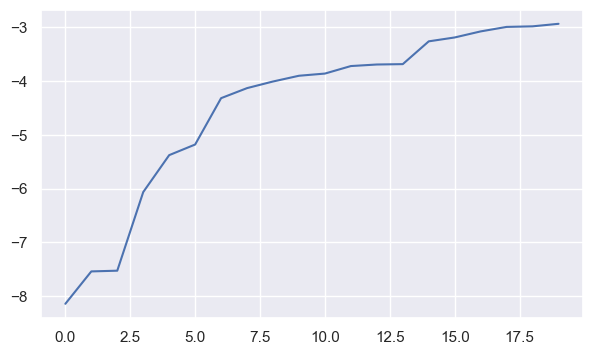

In [41]:
plt.figure(figsize=(7,4))
plt.plot(np.sort(train_df_scores)[0:20])

In [42]:
np.sort(train_df_scores)[0:20]

array([-8.14429834, -7.54146264, -7.52799929, -6.06529913, -5.377665  ,
       -5.18002043, -4.31719926, -4.13038995, -4.00719198, -3.90020394,
       -3.85961652, -3.71974845, -3.69089584, -3.68382696, -3.25988559,
       -3.18759304, -3.07492026, -2.99118297, -2.98056411, -2.93349366])

In [43]:
trashold = np.sort(train_df_scores)[6]

In [44]:
train_df = train_df[train_df_scores>trashold]

In [45]:
train_df.shape

(1453, 233)

## OUTLIERS-END

## PREPROCESSİNG FOR TEST DATA

In [49]:
test = pd.read_csv("test.csv")
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story            5            6       1961          1961     Gable  CompShg     VinylSd     VinylSd       None       0.000        TA        TA     CBlock       TA       TA           No          Rec     468.000          LwQ     144.000    270.000      882.000    GasA        TA          Y      SBrkr       896         0             0   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story            6            6       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace     108.000        TA        TA     CBlock       TA       TA           No          ALQ     923.000          Unf       0.000    406.000     1329.000    GasA        TA          Y      SBrkr      1329         0             0   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            5            5       1997          1998     Gable  CompShg     VinylSd     VinylSd       None       0.000        TA        TA      PConc       Gd       TA           No          GLQ     791.000          Unf       0.000    137.000      928.000    GasA        Gd          Y      SBrkr       928       701             0   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story            6            6       1998          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace      20.000        TA        TA      PConc       TA       TA           No          GLQ     602.000          Unf       0.000    324.000      926.000    GasA        Ex          Y      SBrkr       926       678             0   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1         HLS    AllPub    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story            8            5       1992          1992     Gable  CompShg     HdBoard     HdBoard       None       0.000        Gd        TA      PConc       Gd       TA           No          ALQ     263.000          Unf       0.000   1017.000     1280.000    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  
0        896         0.000         0.000         1         0             2             1          TA             5        Typ           0         NaN     Attchd     1961.000          Unf       1.000     730.000         TA         TA          Y         140            0              0          0          120         0    NaN  MnPrv         NaN        0       6    2010       WD        Normal  
1       1329         0.000         0.000         1         1             3             1          Gd             6        Typ           0         NaN     Attchd     1958.000          Unf       1.000     312.000      

In [50]:
test = test.drop("GarageArea", axis=1)

In [52]:
for col in garage_cols:
    test[col].replace(to_replace=np.nan, value = "No", inplace = True)

for col in bsmt_cols:
    test[col].replace(to_replace=np.nan, value = "No", inplace = True)

In [53]:
test["PoolQC"].replace(to_replace=np.nan, value= "No", inplace=True)
test["Alley"].replace(to_replace=np.nan, value= "No", inplace=True)
test["MiscFeature"].replace(to_replace=np.nan, value= "No", inplace=True)
test["FireplaceQu"].replace(to_replace=np.nan, value= "No", inplace=True)
test["FireplaceQu"].replace(to_replace=np.nan, value= "No", inplace=True)
test["Fence"].replace(to_replace=np.nan, value= "No", inplace=True)

In [55]:
missing_values_table(test,True)

               n_miss  ratio
LotFrontage       227 15.560
MasVnrType         16  1.100
MasVnrArea         15  1.030
MSZoning            4  0.270
BsmtFullBath        2  0.140
BsmtHalfBath        2  0.140
Functional          2  0.140
Utilities           2  0.140
Exterior2nd         1  0.070
Exterior1st         1  0.070
KitchenQual         1  0.070
BsmtFinSF1          1  0.070
BsmtFinSF2          1  0.070
BsmtUnfSF           1  0.070
TotalBsmtSF         1  0.070
SaleType            1  0.070
KitchenAbvGr        0  0.000
BedroomAbvGr        0  0.000
TotRmsAbvGrd        0  0.000
HalfBath            0  0.000
Fireplaces          0  0.000
FireplaceQu         0  0.000
GarageType          0  0.000
GarageYrBlt         0  0.000
FullBath            0  0.000
Id                  0  0.000
GarageFinish        0  0.000
LowQualFinSF        0  0.000
GarageCars          0  0.000
YrSold              0  0.000
MoSold              0  0.000
MiscVal             0  0.000
MiscFeature         0  0.000
Fence         

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'SaleType']

In [56]:
test_df = test.copy()
cat_cols_t, num_cols_t, cat_but_car_t = grab_col_names(test_df)

Observations: 1459
Variables: 79
cat_cols: 53
num_cols: 24
cat_but_car: 2
num_but_cat: 10


In [61]:
test_df = pd.get_dummies(test_df[cat_cols_t+num_cols_t], drop_first=True)

In [62]:
test_df.head()

OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  PoolArea  YrSold    Id  MSSubClass  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  MoSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_No  Alley_Pave  \
0            6         0.000         0.000         1         0             2             1           0         0    2010  1461          20       80.000    11622            5       1961          1961       0.000     468.000     144.000    270.000      882.000       896         0             0        896             5         140            0              0          0          120        0       6            0            1            0            0            1         1           0   
1            6         0.000         0.000         1         1             3             1           0         0    2010  1462          20       81.000    14267            6       1958          1958     108.000     923.000       0.000    406.000     1329.000      1329         0             0       1329             6         393           36              0          0            0    12500       6            0            0            1            0            1         1           0   
2            5         0.000         0.000         2         1             3             1           1         0    2010  1463          60       74.000    13830            5       1997          1998       0.000     791.000       0.000    137.000      928.000       928       701             0       1629             6         212           34              0          0            0        0       3            0            0            1            0            1         1           0   
3            6         0.000         0.000         2         1             3             1           1         0    2010  1464          60       78.000     9978            6       1998          1998      20.000     602.000       0.000    324.000      926.000       926       678             0       1604             7         360           36              0          0            0        0       6            0            0            1            0            1         1           0   
4            5         0.000         0.000         2         0             2             1           0         0    2010  1465         120       43.000     5005            8       1992          1992       0.000     263.000       0.000   1017.000     1280.000      1280         0             0       1280             5           0           82              0          0          144        0       1            0            0            1            0            1         1           0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  \
0             0             0             1                0                0                1                  0              0              0                 1              0              0                 1                0                0                0                0                0                0                0                 0                1                0                0                0                0               0                0                  0   
1             0             0             0                0                0                1

In [64]:
scaler = MinMaxScaler()
test_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)
test_df.head()

OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  PoolArea  YrSold    Id  MSSubClass  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  MoSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_No  Alley_Pave  \
0        0.625         0.000         0.000     0.250     0.000         0.333         0.500       0.000     0.000   1.000 0.000       0.000        0.330    0.184        0.444      0.626         0.183       0.000       0.117       0.094      0.126        0.173     0.104     0.000         0.000      0.104         0.167       0.098        0.000          0.000      0.000        0.208    0.000   0.455        0.000        1.000        0.000        0.000        1.000     1.000       0.000   
1        0.625         0.000         0.000     0.250     0.500         0.500         0.500       0.000     0.000   1.000 0.001       0.000        0.335    0.232        0.556      0.603         0.133       0.084       0.230       0.000      0.190        0.261     0.197     0.000         0.000      0.197         0.250       0.276        0.049          0.000      0.000        0.000    0.735   0.455        0.000        0.000        1.000        0.000        1.000     1.000       0.000   
2        0.500         0.000         0.000     0.500     0.500         0.500         0.500       0.250     0.000   1.000 0.001       0.235        0.296    0.224        0.444      0.901         0.800       0.000       0.197       0.000      0.064        0.182     0.111     0.376         0.000      0.261         0.250       0.149        0.046          0.000      0.000        0.000    0.000   0.182        0.000        0.000        1.000        0.000        1.000     1.000       0.000   
3        0.625         0.000         0.000     0.500     0.500         0.500         0.500       0.250     0.000   1.000 0.002       0.235        0.318    0.154        0.556      0.908         0.800       0.016       0.150       0.000      0.151        0.182     0.111     0.364         0.000      0.255         0.333       0.253        0.049          0.000      0.000        0.000    0.000   0.455        0.000        0.000        1.000        0.000        1.000     1.000       0.000   
4        0.500         0.000         0.000     0.500     0.000         0.333         0.500       0.000     0.000   1.000 0.003       0.588        0.123    0.064        0.778      0.863         0.700       0.000       0.066       0.000      0.475        0.251     0.186     0.000         0.000      0.186         0.167       0.000        0.111          0.000      0.000        0.250    0.000   0.000        0.000        0.000        1.000        0.000        1.000     1.000       0.000   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  \
0         0.000         0.000         1.000            0.000            0.000            1.000              0.000          0.000          0.000             1.000          0.000          0.000             1.000            0.000            0.000            0.000            0.000            0.000            0.000            0.000             0.000            1.000            0.000            0.000            0.000            0.000           0.000            0.000              0.000   
1         0.000         0.000         0.000            0.000            0.000            1.000

In [65]:
imputer = KNNImputer(n_neighbors=5)
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)
dft_cols = test_df.columns

In [66]:
test_df = scaler.inverse_transform(test_df)
test_df = pd.DataFrame(test_df, columns=dft_cols)
test_df.head()

OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  PoolArea   YrSold       Id  MSSubClass  LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   MiscVal  MoSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_No  Alley_Pave  \
0        6.000         0.000         0.000     1.000     0.000         2.000         1.000       0.000     0.000 2010.000 1461.000      20.000       80.000 11622.000        5.000   1961.000      1961.000       0.000     468.000     144.000    270.000      882.000   896.000     0.000         0.000    896.000         5.000     140.000        0.000          0.000      0.000      120.000     0.000   6.000        0.000        1.000        0.000        0.000        1.000     1.000       0.000   
1        6.000         0.000         0.000     1.000     1.000         3.000         1.000       0.000     0.000 2010.000 1462.000      20.000       81.000 14267.000        6.000   1958.000      1958.000     108.000     923.000       0.000    406.000     1329.000  1329.000     0.000         0.000   1329.000         6.000     393.000       36.000          0.000      0.000        0.000 12500.000   6.000        0.000        0.000        1.000        0.000        1.000     1.000       0.000   
2        5.000         0.000         0.000     2.000     1.000         3.000         1.000       1.000     0.000 2010.000 1463.000      60.000       74.000 13830.000        5.000   1997.000      1998.000       0.000     791.000       0.000    137.000      928.000   928.000   701.000         0.000   1629.000         6.000     212.000       34.000          0.000      0.000        0.000     0.000   3.000        0.000        0.000        1.000        0.000        1.000     1.000       0.000   
3        6.000         0.000         0.000     2.000     1.000         3.000         1.000       1.000     0.000 2010.000 1464.000      60.000       78.000  9978.000        6.000   1998.000      1998.000      20.000     602.000       0.000    324.000      926.000   926.000   678.000         0.000   1604.000         7.000     360.000       36.000          0.000      0.000        0.000     0.000   6.000        0.000        0.000        1.000        0.000        1.000     1.000       0.000   
4        5.000         0.000         0.000     2.000     0.000         2.000         1.000       0.000     0.000 2010.000 1465.000     120.000       43.000  5005.000        8.000   1992.000      1992.000       0.000     263.000       0.000   1017.000     1280.000  1280.000     0.000         0.000   1280.000         5.000       0.000       82.000          0.000      0.000      144.000     0.000   1.000        0.000        0.000        1.000        0.000        1.000     1.000       0.000   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  Condition2_PosN  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  \
0         0.000         0.000         1.000            0.000            0.000            1.000              0.000          0.000          0.000             1.000          0.000          0.000             1.000            0.000            0.000            0.000            0.000            0.000            0.000            0.000             0.000            1.000            0.000            0.000            0.000            0.000           0.000            0.000              0.000   
1         0.000         0.000         0.000            0.0

In [67]:
test_df.isna().sum().any()

False

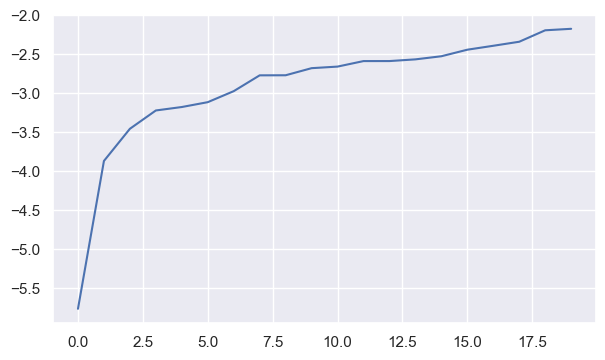

In [69]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(test_df)
test_df_scores = clf.negative_outlier_factor_
plt.figure(figsize=(7,4))
plt.plot(np.sort(test_df_scores)[0:20])

In [70]:
np.sort(test_df_scores)[0:20]

array([-5.76111595, -3.86801676, -3.45607318, -3.22148655, -3.17733783,
       -3.11524185, -2.97429206, -2.77165516, -2.770709  , -2.67987993,
       -2.65972893, -2.58913674, -2.58893431, -2.5671342 , -2.52728509,
       -2.44341265, -2.39311203, -2.34146422, -2.19486528, -2.17584276])

In [71]:
trashold_t = np.sort(test_df_scores)[4]
test_df = test_df[test_df_scores>trashold_t]

In [82]:
for col in test_df.columns:
    print(col)

OverallCond
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
Fireplaces
PoolArea
YrSold
Id
MSSubClass
LotFrontage
LotArea
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
TotRmsAbvGrd
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal
MoSold
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
Alley_No
Alley_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Condition1_Feedr
Condition1_Norm
Condition1_PosA
Condition1_PosN
Condition1_RRAe
Condition1_RRAn
Condition1_RRNe
Condition1_RRNn
Condition2_Feedr
Condition2_Norm
Condition2_PosA
Condition2_PosN
BldgType_2fmCon
BldgType_Duplex
BldgType_Twnhs
BldgType_TwnhsE
HouseStyle_1.5Unf
HouseStyle_1Story
HouseStyle_2.5Unf
HouseStyle_2Story
HouseStyle_SFoyer
HouseStyle_SLvl
RoofStyle_Gable
Ro

In [83]:
for col in train_df.columns:
    print(col)

OverallCond
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
Fireplaces
GarageCars
PoolArea
YrSold
MSSubClass
LotFrontage
LotArea
OverallQual
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
TotRmsAbvGrd
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal
MoSold
SalePrice
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
Alley_No
Alley_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_NoSeWa
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Condition1_Feedr
Condition1_Norm
Condition1_PosA
Condition1_PosN
Condition1_RRAe
Condition1_RRAn
Condition1_RRNe
Condition1_RRNn
Condition2_Feedr
Condition2_Norm
Condition2_PosA
Condition2_PosN
Condition2_RRAe
Condition2_RRAn
Condition2_RRNn
BldgType_2fmCon
BldgType_Duplex
BldgType_Twnhs
BldgType_TwnhsE
HouseStyle_1.5Unf
HouseStyle_1Story
House

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [73]:
rfr = RandomForestRegressor(n_estimators = 100, random_state=42)
dtr = DecisionTreeRegressor(random_state=42)

In [74]:
print("SalePrice" in train_df.columns)

True


In [75]:
from sklearn.model_selection import train_test_split
X = train_df.drop("SalePrice", axis = 1)
y = train_df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [76]:
rfr.fit(X_train,y_train)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [77]:
rfr.score(X,y)

0.9617083267277267

In [78]:
dtr.score(X,y)

0.957131347178985

In [79]:
#X_test = pd.read_csv("test.csv")
#y_test = pd.read_csv("sample_submission.csv")["SalePrice"]

In [80]:
rfr.predict(test_df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- GarageCars_1.0
- GarageCars_2.0
- GarageCars_3.0
- GarageCars_4.0
- GarageCars_5.0
- ...
Feature names seen at fit time, yet now missing:
- Condition2_RRAe
- Condition2_RRAn
- Condition2_RRNn
- Electrical_Mix
- Exterior1st_ImStucc
- ...


In [54]:
dtr.score(X_test, y_test)

0.7544897470981722